In [24]:
%pip install --quiet pandas seaborn matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:


from dotenv import load_dotenv
load_dotenv()



True

In [26]:
from pathlib import Path
import json
# analysis_file_path = Path("../V1_DATA/analysis-llama3.1:8b-instruct-q5_k_m.json")
analysis_file_path = Path("../V1_DATA/analysis-men-items-llama3.1:8b-instruct-q5_k_m.json")
analysis_data = json.loads(analysis_file_path.read_text())
stop_index = 1000
inventory_data = []
for index, data in enumerate(analysis_data.items()):
    inventory_data.append(data[1])
    if index == stop_index:
        break


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(inventory_data)


In [41]:
# # Function to plot categorical data
# def plot_categorical(df, column):
#     plt.figure(figsize=(10, 6))
#     df[column].value_counts().plot(kind='bar')
#     plt.title(f"Distribution of {column}")
#     plt.ylabel("Count")
#     plt.xticks(rotation=45)
#     plt.show()

# # Plot for each categorical variable
# categorical_columns = ['brand', 'weather', 'usage', 'type', 'material', 'color', 'target_audience']
# for column in categorical_columns:
#     plot_categorical(df, column)

In [29]:
# df.to_csv(f"{analysis_file_path.name}.csv")
path_file = Path(f"{analysis_file_path.parent.absolute()}/{analysis_file_path.name}.xlxs")
df.to_excel(path_file)

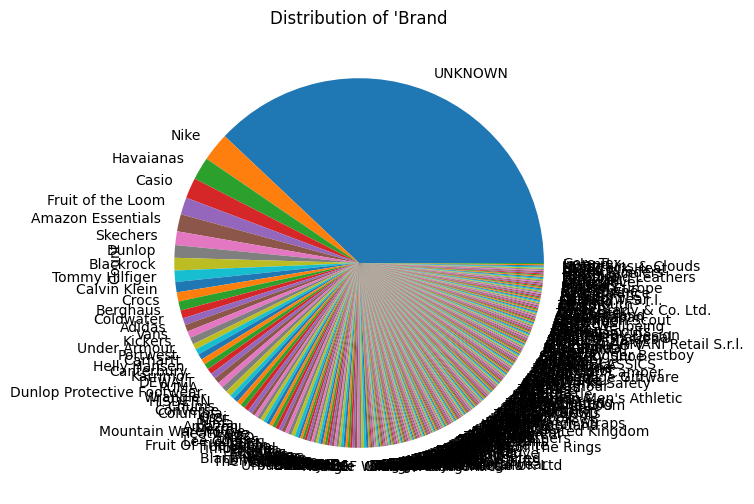

In [46]:
plt.figure(figsize=(10, 6))
df['brand'].value_counts().plot(kind='pie')
plt.title(f"Distribution of 'Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [135]:

mask = df['brand'] == 'Nike'

# df[mask]
# Step 1: Calculate the brand counts
brand_counts = df['brand'].value_counts()

# Step 2: Identify brands with less than 5 products
brands_without_min_products = brand_counts[brand_counts < 5].index.tolist()

# Step 3: Filter the DataFrame to show only products from these brands
filtered_df = df[df['brand'].isin(brands_without_min_products)]

# If you also need to identify brands with 5 or more products
brands_with_min_products = brand_counts[brand_counts >= 5].index.tolist()

# filtered_df

In [137]:
brands_count = df['brand'].value_counts()
less_than_5_products_mask = brand_counts < 5
brands_without_min_products = list(brand_counts[less_than_5_products_mask.index])

df[df['brand'].isin(brands_without_min_products)]


,name,product_asin,total_customers_that_rated,overall_ratings,brand,available_written_reviews,weather,usage,type,material,color,target_audience,price,currency,ciam_category
